In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics


In [42]:
df = pd.read_csv("../../data/Salary_Data.csv")
print(df.head())




    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [43]:
print("\n🔍 Missing Values Before Cleaning:")
print(df.isnull().sum())


🔍 Missing Values Before Cleaning:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [ ]:
df = df.dropna()   
print("\n✅ Missing Values After Cleaning:")
print(df.isnull().sum())




✅ Missing Values After Cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
X = df[['Years of Experience']]  
y = df['Salary']              

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).ravel()



In [ ]:
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train_scaled)
#test

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [49]:

y_pred_scaled = model.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

y_actual = sc_y.inverse_transform(y_test_scaled.reshape(-1, 1))




In [50]:
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("\n📊 Model Evaluation Metrics:")
print(f"R² Score       : {r2:.4f}")
print(f"Mean Abs Error : {mae:.2f}")
print(f"Root MSE       : {rmse:.2f}")



📊 Model Evaluation Metrics:
R² Score       : 0.7354
Mean Abs Error : 20203.37
Root MSE       : 27467.45


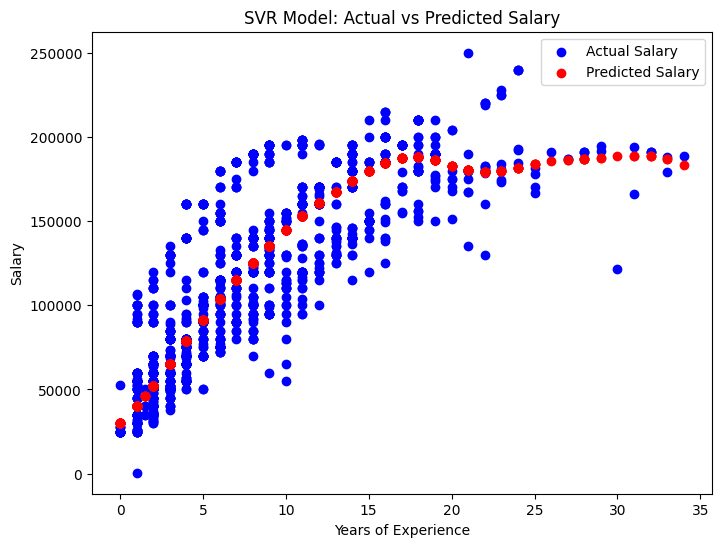

In [51]:

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_actual, color='blue', label='Actual Salary')
plt.scatter(X_test, y_pred, color='red', label='Predicted Salary')
plt.title("SVR Model: Actual vs Predicted Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()


In [56]:

new_data = pd.DataFrame([[5], [10], [12]], columns=['Years of Experience'])

new_data_scaled = sc_X.transform(new_data)
predicted_salary = sc_y.inverse_transform(
    model.predict(new_data_scaled).reshape(-1, 1)
)


result_df = pd.DataFrame({
    "Years of Experience": new_data["Years of Experience"],
    "Predicted Salary (LKR)": predicted_salary.flatten().round(2)
})


print("Salary Prediction Results (Support Vector Regression Model):\n")
print(result_df.to_string(index=False))


Salary Prediction Results (Support Vector Regression Model):

 Years of Experience  Predicted Salary (LKR)
                   5                91417.17
                  10               144548.44
                  12               160463.91
